## Colab Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
Change directory to where this file is located
"""
# %cd 'COPY&PASTE FILE DIRECTORY HERE'

/content/drive/MyDrive/2-1_MLDL/hw2/dataset


## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# You may import other models from scikit-learn.
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate


## 1. Diabetes Classification

In [11]:
diabetes = pd.read_csv("diabetes.csv") # load dataset

In [6]:
len(diabetes)

768

In [7]:
diabetes.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Question (a)
Train **at least 2** different classification models for the diabetes dataset and briefly explain your choice of models.

Make sure the training and evaluation codes are run in this notebook, and the results should be printed out. e.g., accuracy: 00%

(We will not run the cells to train and evaluate the models if the results are not printed out in your submitted file.)

your answer here

In [ ]:
# your code here
X = diabetes.iloc[:,:-1]
Y = diabetes.iloc[:,-1]

scaler = StandardScaler()
svm_acc = []
logi_acc = []
train_X,test_X, train_Y, test_Y = train_test_split(X,Y,test_size=0.1, random_state=10)
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)

SVM = LinearSVC(C= 0.08185467307069029, max_iter = 1000,dual = False, penalty="l1")
SVM.fit(X_train_scaled,train_Y)
print(f"SVM accuracy:{SVM.score(X_test_scaled,test_Y)*100}%")

logistic = LogisticRegression(C= 0.2721338768375309  , max_iter = 1000,penalty='l1', solver = 'saga')
logistic.fit(X_train_scaled, train_Y)
print(f"Logistic accuracy:{logistic.score(X_test_scaled,test_Y)*100}%")

SVM accuracy:74.02597402597402%
Logistic accuracy:75.32467532467533%


### Question (b)
In the next cell, report the best model and explain why you chose this model.

In your explanation, include the differences between the models you fitted in (a).

Also, describe how you optimized the final model to get the best performance.

You will get full credit if you plot the process of model optimization.

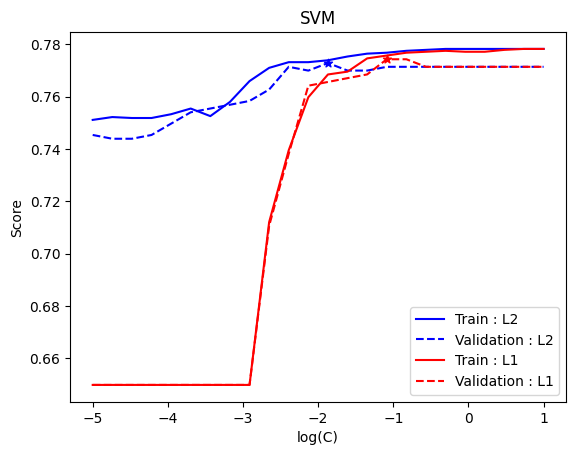

=========== SVC : L2 Regularization Summary ===========
Optimal C : 0.013503140378698722 
Performance at optimal C : 0.7728286935668857
=========== SVC : L1 Regularization Summary ===========
Optimal C : 0.08185467307069029 
Performance at optimal C : 0.774267542487749


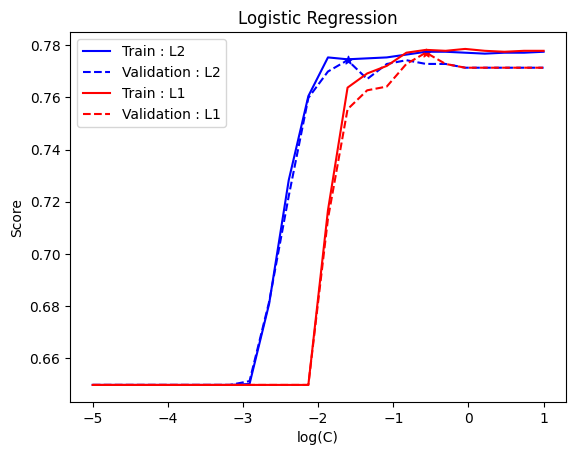

=========== logistic regression : L2 Regularization Summary ===========
Optimal C : 0.024620924014946255 
Performance at optimal C : 0.7742571160462933
=========== logistic regression : L1 Regularization Summary ===========
Optimal C : 0.2721338768375309 
Performance at optimal C : 0.7771660932123865


In [9]:
C_values = np.logspace(-5, 1, 24)
model_lst = [LinearSVC, LogisticRegression]
train_X,test_X, train_Y, test_Y = train_test_split(X,Y,test_size=0.1, random_state= 10)

for model in model_lst:
    name = "SVC" if issubclass(model, LinearSVC) else "logistic regression"
    plt.figure()
    train_scores_l2 = []
    val_scores_l2 = []
    train_scores_l1 = []
    val_scores_l1 = []
    for C in C_values:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model(C=C, max_iter=1000, dual=False))
        ])
        scores = cross_validate(pipeline, train_X, train_Y, cv=5, return_train_score=True)
        train_scores_l2.append(np.mean(scores['train_score']))
        val_scores_l2.append(np.mean(scores['test_score']))
        pipeline.fit(train_X, train_Y)

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model(C=C, max_iter=1000, dual=False, penalty = 'l1'))if issubclass(model, LinearSVC) else ('model', model(C=C, max_iter=1000, dual=False, penalty = 'l1', solver = 'saga'))
        ])
        scores = cross_validate(pipeline, train_X, train_Y, cv=5, return_train_score=True)
        train_scores_l1.append(np.mean(scores['train_score']))
        val_scores_l1.append(np.mean(scores['test_score']))
        pipeline.fit(train_X, train_Y)        
    plt.plot(np.log10(C_values), train_scores_l2, ls='-', color='b', label="Train : L2")
    plt.plot(np.log10(C_values), val_scores_l2, ls='--', color='b', label="Validation : L2")
    max_score_idx_l2 = np.argmax(val_scores_l2)
    plt.scatter(np.log10(C_values[max_score_idx_l2]), val_scores_l2[max_score_idx_l2], marker='*', color='b')
    plt.xlabel("log(C)")
    plt.ylabel("Score")
    plt.title(f"SVM" if issubclass(model, LinearSVC) else f"Logistic Regression")

    plt.plot(np.log10(C_values), train_scores_l1, ls='-', color='r', label="Train : L1")
    plt.plot(np.log10(C_values), val_scores_l1, ls='--', color='r', label="Validation : L1")
    max_score_idx_l1 = np.argmax(val_scores_l1)
    plt.scatter(np.log10(C_values[max_score_idx_l1]), val_scores_l1[max_score_idx_l1], marker='*', color='r')
    plt.legend()
    plt.show()
    print(f"=========== {name} : L2 Regularization Summary ===========")
    print(f"Optimal C : {C_values[max_score_idx_l2]} \nPerformance at optimal C : {val_scores_l2[max_score_idx_l2]}" )
    print(f"=========== {name} : L1 Regularization Summary ===========")
    print(f"Optimal C : {C_values[max_score_idx_l1]} \nPerformance at optimal C : {val_scores_l1[max_score_idx_l1]}" )
    


your answer for (b) here

The primary focus was on optimizing the regularization coefficient C in both models, utilizing the k-fold cross validation method. Of note, L1 regularization was selected for use in both models. As the above figures indicate, L1 regularization exhibited marginally superior performance in comparison to L2 regularization within both models. 

Furthermore, in order to enhance the stability of model training, the train and test data were preprocessed to achieve a mean of zero and unit variance. To enhance the readability of the plot, a semi-log plot was drawn with respect to C. 

Upon close examination, it was noted that the optimal C for Logistic Regression was 0.2721338768375309, while for SVM it was 0.08185467307069029. At these respective points, the Logistic Regression model demonstrated slightly superior validation performance in comparison to the SVM model (0.774 vs 0.777). 

In conclusion, given that the validation score in Logistic Regression with L1 regularization was the highest, it was determined that Logistic Regression would be the most suitable model for this data set.

## 2. Credit Score Classification

In [2]:
credit_score = pd.read_csv("credit_score.csv")

In [3]:
len(credit_score)

30000

In [4]:
credit_score.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,8,34.0,Musician,30375.050,2426.254167,6.0,5.0,6.0,0.0,No Data,...,Standard,1367.11,35.452909,260.0,No,0.000000,35.244025,High_spent_Medium_value_payments,448.481023,Standard
1,6,47.0,Accountant,16609.095,1488.091250,2.0,3.0,4.0,3.0,"home equity loan,credit-builder loan,student loan",...,Good,864.00,36.989979,277.0,No,22.411006,26.706984,Low_spent_Small_value_payments,305.872096,Good
2,1,17.0,Writer,66289.360,5433.113333,4.0,5.0,15.0,2.0,"personal loan,student loan",...,Standard,713.33,35.810164,189.0,Yes,61.325213,59.890917,High_spent_Medium_value_payments,524.549646,Standard
3,6,40.0,Accountant,72936.680,5800.056667,0.0,2.0,12.0,1.0,student loan,...,Good,827.89,37.082235,381.0,No,51.672175,80.016877,High_spent_Medium_value_payments,698.316615,Good
4,6,39.0,Teacher,31846.760,2703.896667,2.0,4.0,7.0,2.0,"student loan,credit-builder loan",...,Good,881.26,35.267508,190.0,No,27.407887,64.455327,High_spent_Small_value_payments,392.324645,Good


### Question (c)
Train **at least 2** different classification models for the diabetes dataset and briefly explain your choice of models.

Make sure the training and evaluation codes are run in this notebook, and the results should be printed out. e.g., accuracy: 00%

(We will not run the cells to train and evaluate the models if the results are not printed out in your submitted file.)

your answer here

In [9]:
df = credit_score.drop('Credit_Score',axis = 1)
#preprocessing
df = df.dropna() #fill missing values with mean
df = pd.get_dummies(df) #convert categorical variables to numerical

#define predictors and target
X = df #replace 'Credit_Score' with the column you want to predict
y = credit_score['Credit_Score']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#logistic regression
logistic_model = LogisticRegression(C= 0.021544346900318822,max_iter = 1000)
logistic_model.fit(X_train_scaled, y_train)
logistic_predictions = logistic_model.predict(X_test_scaled)
print(f"Logistic Regression accuracy: {accuracy_score(y_test, logistic_predictions)*100}%")

#RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 80, min_samples_split=2)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
print(f"RandomForestClassifier accuracy:  {accuracy_score(y_test, rf_predictions)*100}%")

Logistic Regression accuracy: 72.03333333333333%
RandomForestClassifier accuracy:  77.26666666666667%


### Question (d)
In the next cell, report the best model and explain why you chose this model.

In your explanation, include the differences between the models you fitted in (a).

Also, describe how you optimized the final model to get the best performance.

You will get full credit if you plot the process of model optimization.

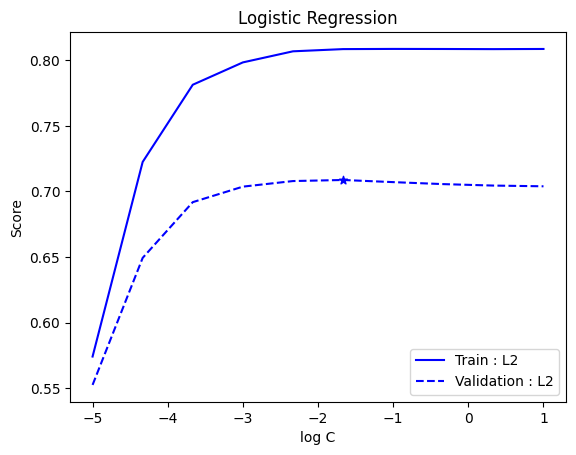

=========== Logistic Regression : L2 Regularization Summary ===========
Optimal C : 0.021544346900318822 
Performance at optimal C : 0.7087777777777777


In [6]:
# optimize your model here
# plotting the optimization process is necessary to get full credit.

df = credit_score.drop('Credit_Score',axis = 1)
#preprocessing
df = df.dropna() #fill missing values with mean
df = pd.get_dummies(df) #convert categorical variables to numerical

#define predictors and target
X = df #replace 'Credit_Score' with the column you want to predict
y = credit_score['Credit_Score']


train_X,test_X, train_Y, test_Y = train_test_split(X,y,test_size=0.1, random_state=10)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)

C_lst= np.logspace(-5, 1, 10)
model = LogisticRegression

train_scores_l2 = []
val_scores_l2 = []
train_scores_l1 = []
val_scores_l1 = []
for C in C_lst:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model(C=C, max_iter=1000))
    ])
    scores = cross_validate(pipeline, train_X, train_Y, cv=5, return_train_score=True)
    train_scores_l2.append(np.mean(scores['train_score']))
    val_scores_l2.append(np.mean(scores['test_score']))
    pipeline.fit(train_X, train_Y)     

plt.plot(np.log10(C_lst), train_scores_l2,ls = '-',color = 'b',label = "Train : L2")
plt.plot(np.log10(C_lst), val_scores_l2,ls = '--',color = 'b',label = "Validation : L2")
max_score_idx_l2 = np.argmax(val_scores_l2)
plt.scatter(np.log10(C_lst[max_score_idx_l2]), val_scores_l2[max_score_idx_l2],marker = "*",color = 'b')

plt.xlabel("log C")
plt.ylabel("Score")
plt.title("Logistic Regression")
plt.legend()
plt.show()

print("=========== Logistic Regression : L2 Regularization Summary ===========")
print(f"Optimal C : {C_lst[max_score_idx_l2]} \nPerformance at optimal C : {val_scores_l2[max_score_idx_l2]}" )

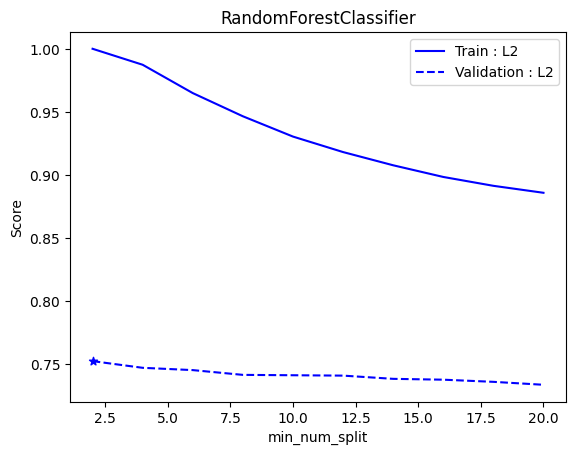

=========== RandomForestClassifier ===========
Optimal min_samples_split : 2 
Performance at optimal C : 0.7525185185185185


In [4]:
# optimize your model here
# plotting the optimization process is necessary to get full credit.

df = credit_score.drop('Credit_Score',axis = 1)
#preprocessing
df = df.dropna() #fill missing values with mean
df = pd.get_dummies(df) #convert categorical variables to numerical

#define predictors and target
X = df #replace 'Credit_Score' with the column you want to predict
y = credit_score['Credit_Score']


train_X,test_X, train_Y, test_Y = train_test_split(X,y,test_size=0.1, random_state=10)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)

C_lst= range(2,21,2)
model = RandomForestClassifier

train_scores = []
val_scores = []

for C in C_lst:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model(n_estimators = 80, min_samples_split = int(C)))
    ])
    scores = cross_validate(pipeline, train_X, train_Y, cv=5, return_train_score=True)
    train_scores.append(np.mean(scores['train_score']))
    val_scores.append(np.mean(scores['test_score']))
    pipeline.fit(train_X, train_Y)     

plt.plot(C_lst, train_scores,ls = '-',color = 'b',label = "Train : L2")
plt.plot(C_lst, val_scores,ls = '--',color = 'b',label = "Validation : L2")
max_score_idx = np.argmax(val_scores)
plt.scatter(C_lst[max_score_idx], val_scores[max_score_idx],marker = "*",color = 'b')

plt.xlabel("min_num_split")
plt.ylabel("Score")
plt.title("RandomForestClassifier")
plt.legend()
plt.show()

print(f"=========== RandomForestClassifier ===========")
print(f"Optimal min_samples_split : {C_lst[max_score_idx]} \nPerformance at optimal C : {val_scores[max_score_idx]}" )


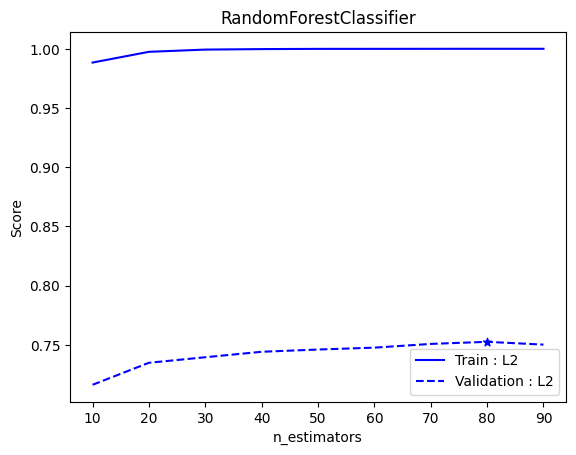

=========== RandomForestClassifier ===========
Optimal n_estimators : 80 
Performance at optimal C : 0.7524814814814815


In [17]:
# optimize your model here
# plotting the optimization process is necessary to get full credit.

df = credit_score.drop('Credit_Score',axis = 1)
#preprocessing
df = df.dropna() #fill missing values with mean
df = pd.get_dummies(df) #convert categorical variables to numerical

#define predictors and target
X = df #replace 'Credit_Score' with the column you want to predict
y = credit_score['Credit_Score']


train_X,test_X, train_Y, test_Y = train_test_split(X,y,test_size=0.1, random_state=10)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)

C_lst= range(10,100,10)
model = RandomForestClassifier

train_scores = []
val_scores = []

for C in C_lst:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model(n_estimators= int(C)))
    ])
    scores = cross_validate(pipeline, train_X, train_Y, cv=5, return_train_score=True)
    train_scores.append(np.mean(scores['train_score']))
    val_scores.append(np.mean(scores['test_score']))
    pipeline.fit(train_X, train_Y)     

plt.plot(C_lst, train_scores,ls = '-',color = 'b',label = "Train : L2")
plt.plot(C_lst, val_scores,ls = '--',color = 'b',label = "Validation : L2")
max_score_idx = np.argmax(val_scores)
plt.scatter(C_lst[max_score_idx], val_scores[max_score_idx],marker = "*",color = 'b')

plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.title("RandomForestClassifier")
plt.legend()
plt.show()

print(f"=========== RandomForestClassifier ===========")
print(f"Optimal n_estimators : {C_lst[max_score_idx]} \nPerformance at optimal C : {val_scores[max_score_idx]}" )


I tried to optimize the regularization in both models as before. The regularization coefficient C obviously affect to the regularization, while the min_spample_split also control the overfitting in random forest. I also optimized n_estimators, the number of tree in forest, and I found empirically that optimized n_estimators makes the classifier more accurate. Thus, for RandomForestClassifier, n_estimators was set to 80.

Further, I optimized the number of trees in the forest (n_estimators) for the RandomForestClassifier and found that the model's accuracy increased when n_estimators was set to 80. It is also important to note that unlike the Logistic Regression model in problem (a), I did not compare Logistic Regression with L2 regularization and L1 regularization here. This is due to the fact that the L1 regularization did not converge and yielded a ConvergenceWarning, indicating that it would require a higher max_iter, which is computationally expensive.

In terms of parameter optimization, the optimal min_sample_split for the RandomForestClassifier was found to be 2, the minimum possible value, resulting in a validation score of 0.7525185185185185. For the Logistic Regression model, the optimal regularization coefficient C was 0.021544346900318822, yielding a performance score of 0.7087777777777777. Given these validation accuracies, it is evident that the RandomForestClassifier is the more suitable model for the credit score dataset.

### Question (e)
In the next cell, examine the differences between the two datasets with respect to the reasoning behind your choice of the the best model for each dataset.

Both the credit score and diabetes datasets are qualitative in nature and are utilized for classification tasks. However, they exhibit significant differences. As illustrated in the figures below, where each dataset is visualized in a 2D plane using PCA and t-SNE respectively, it is evident that the credit score dataset is not linearly separable due to the substantial overlap between data points. Conversely, the diabetes dataset appears to be more amenable to linear separation. This discrepancy makes the training cost for models more expensive for the credit score dataset, especially considering its size.

Additionally, the credit score dataset comprises multiple classes, making it unsuitable for the application of Support Vector Machine (SVM). I instead opted to use the RandomForestClassifier. The superior performance of the RandomForestClassifier in handling the credit score dataset can be attributed to its complex structure and its lack of linear separability. If there is a complex relationship between input features and class labels, linear classifiers such as Logistic Regression may struggle to adequately model the dataset. Furthermore, as RandomForestClassifier employs ensemble learning, it generally outperforms single models when dealing with high-dimensional datasets.

The outperformance of Logistic Regression in the diabetes dataset over SVM is not immediately obvious. However, it can be conjectured that the abundance of data points in the middle of the diabetes dataset makes Logistic Regression more robust and effective. This is because it can construct a stable decision boundary by leveraging the knowledge of the middle point. Without this, the classifier could struggle to establish a robust decision boundary as it may find it challenging to determine where the probability of class 1 exceeds 0.5.

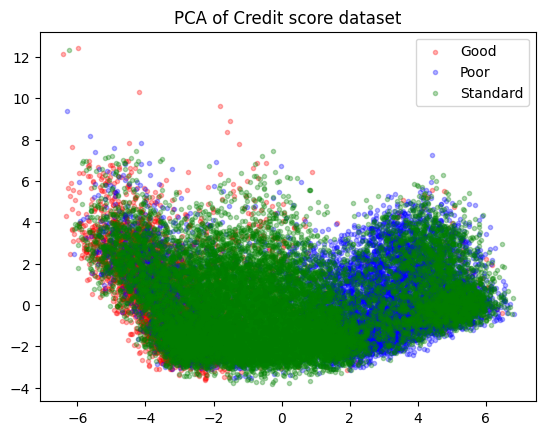

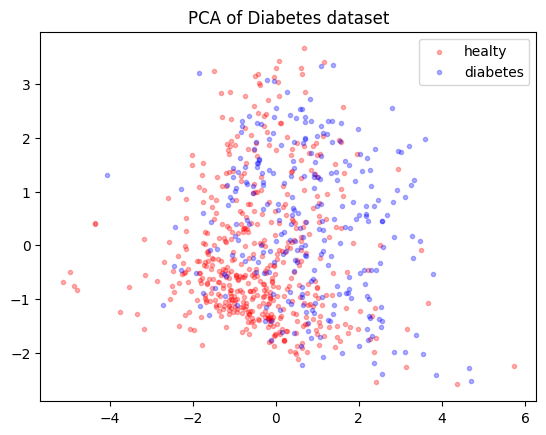

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA

# Load iris dataset as an example
df = credit_score.drop('Credit_Score',axis = 1)
#preprocessing
df = df.dropna() #fill missing values with mean
df = pd.get_dummies(df) #convert categorical variables to numerical

#define predictors and target
X = df #replace 'Credit_Score' with the column you want to predict
y = credit_score['Credit_Score']
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # reduce to 2 components
X_r = pca.fit(X).transform(X)

# Plotting
plt.figure()
colors = ['red','blue','green']
for color, i, target_name in zip(colors, [0, 1, 2],['Good','Poor','Standard']):
    plt.scatter(X_r[y == target_name, 0], X_r[y == target_name, 1], color=color, alpha=.3,
                label=target_name,marker = '.')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Credit score dataset')

plt.show()

X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # reduce to 2 components
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each component

# Plotting
plt.figure()
colors = ['red','blue']
for color, i, target_name in zip(colors, [0, 1],['healty','diabetes']):
    plt.scatter(X_r[y ==i, 0], X_r[y == i, 1], color=color, alpha=.3,
                label=target_name, marker = '.')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Diabetes dataset')

plt.show()


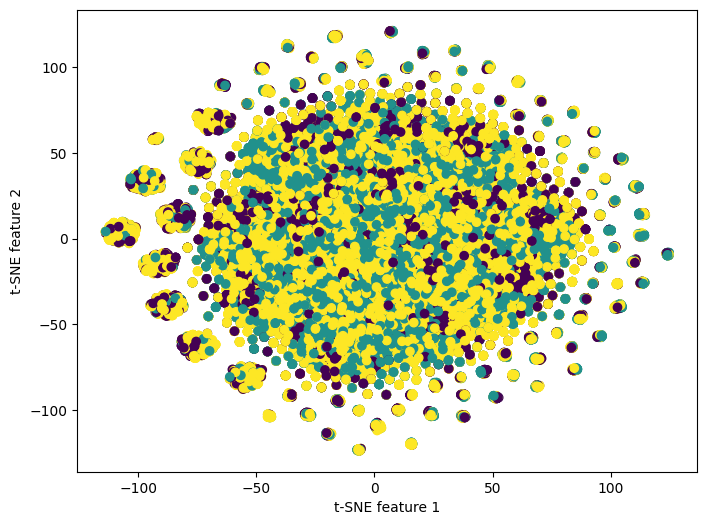

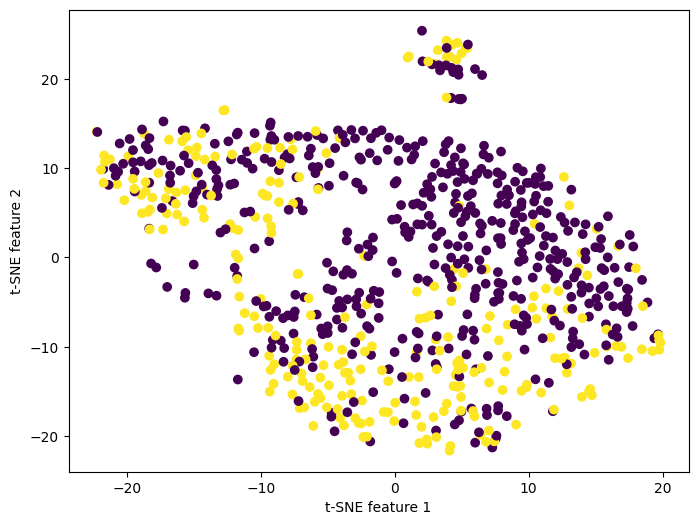

In [62]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA

# Load iris dataset as an example
df = credit_score.drop('Credit_Score',axis = 1)
#preprocessing
df = df.dropna() #fill missing values with mean
df = pd.get_dummies(df) #convert categorical variables to numerical

#define predictors and target
X = df #replace 'Credit_Score' with the column you want to predict
y = credit_score['Credit_Score']
label_encoder= LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Assuming X is your data and y are your labels
tsne = TSNE(n_components=2, random_state=0,perplexity=50)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_encoded)
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]
label_encoder= LabelEncoder()
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Assuming X is your data and y are your labels
tsne = TSNE(n_components=2, random_state=0,perplexity=50)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()